In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
ncr=pd.read_excel('/media/hesham/Y/my ubntu inv/projects/data/NCR_8_25.xlsx')

ncr.tail(2)

/home/hesham/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/hesham/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,م,شهر,تاريخ الرصد\nRecord Date,مصدر الحالة\nSource,100,Column1,الكود\nCode,Column2,النماذج المستخدمة\nForms,منطقة الحدث,...,تاريخ التنفيذ\nTarget Date,on progress,المتابعة\nFollow Up,المتابع\nFollowed by,تاريخ الإغلاق\nDate of Close,Closed On Time,في حالة توقــيع جـزاء عـلى الـعامل,Unnamed: 29,Unnamed: 30,ملاحظات \nNotes
34,NaN,2025-09-01,2025-09-28,قوائم الفحص,NaN,NaN,N/28/9/10,NaN,NaN,المكاتب الادارية,...,NaN,NaN,Opened,محمد فؤاد خليل,2025-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN
35,NaN,2025-09-01,2025-09-29,قوائم الفحص,NaN,NaN,N/29/9/11,NaN,NaN,المطابع,...,NaN,NaN,Opened,علي صلاح علي,1900-10-12 00:00:00,NaN,NaN,NaN,NaN,NaN


In [3]:
# حاول تحويل العمود إلى datetime
ncr['شهر'] = pd.to_datetime(ncr['شهر'], errors='coerce')

In [4]:
# تحقق مرة أخرى من النوع
print(ncr['شهر'].dtype)

datetime64[ns]


In [5]:
august_cases = ncr[ncr['شهر'].dt.month == 8]
july_cases = ncr[ncr['شهر'].dt.month == 7]
sept_cases = ncr[ncr['شهر'].dt.month == 9]

print(f"يوليو: {july_cases.shape}")
print(f"أغسطس: {august_cases.shape}")
print(f"سبتمبر: {sept_cases.shape}")

يوليو: (13, 32)
أغسطس: (12, 32)
سبتمبر: (11, 32)


In [6]:
# عدد الحالات في كل شهر
print(f"عدد حالات يوليو: {len(july_cases)}")
print(f"عدد حالات أغسطس: {len(august_cases)}")
print(f"عدد حالات سبتمبر: {len(sept_cases)}")

عدد حالات يوليو: 13
عدد حالات أغسطس: 12
عدد حالات سبتمبر: 11


In [7]:
ncr_department = ncr.groupby(['الإدارة المتواجد بها الحالة', 'المتابعة\nFollow Up'])\
    ['المتابعة\nFollow Up'].count()\
    .unstack().fillna(0).astype(int)\
    .reset_index()

In [8]:
# حساب مجموع كل صف وإضافة عمود جديد
ncr_department['المجموع'] = ncr_department.sum(axis=1, numeric_only=True)

In [9]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_department = ncr_department.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_department

المتابعة Follow Up,الإدارة المتواجد بها الحالة,Closed,Opened,المجموع
0,الويب,13,1,14
1,الشؤون الادارية,6,1,7
2,الادارة الهندسية,6,0,6
3,التجليد,3,0,3
4,الانتاج,1,1,2
5,IT,0,1,1
6,الحركة,0,1,1
7,المخازن,1,0,1
8,طبع الشيت,1,0,1


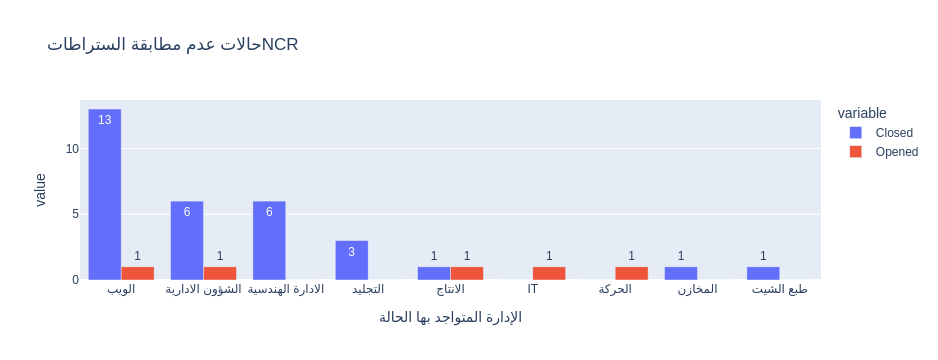

In [10]:
px.bar(data_frame=ncr_department,
       x='الإدارة المتواجد بها الحالة',
       y=['Closed', 'Opened'],
       barmode='group',text_auto=True,
       title='حالات عدم مطابقة الستراطاتNCR')

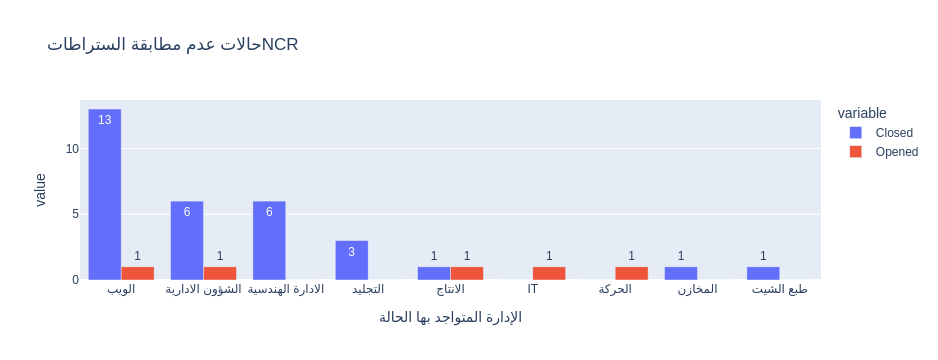

In [114]:
px.bar(data_frame=ncr_department,
       x='الإدارة المتواجد بها الحالة',
       y=['Closed', 'Opened'],
       barmode='group',text_auto=True,
       title='حالات عدم مطابقة الستراطاتNCR')

In [115]:
ncr_hse = ncr.groupby(['إسم الشخص القائم بالتبليغ', 'المتابعة\nFollow Up'])['المتابعة\nFollow Up']\
    .count().unstack().fillna(0).astype(int).reset_index()

In [116]:
# إضافة عمود للمجموع
ncr_hse['المجموع'] = ncr_hse.sum(axis=1, numeric_only=True)

In [117]:
# إضافة عمود للترتيب من الأكثر للأقل
ncr_hse['الترتيب'] = ncr_hse['المجموع'].rank(ascending=False, method='dense').astype(int)

In [118]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_hse = ncr_hse.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_hse

المتابعة Follow Up,إسم الشخص القائم بالتبليغ,Closed,Opened,المجموع,الترتيب
0,احمد مرسي مرسي,19,1,20,1
1,علي صلاح علي,2,2,4,2
2,محمد محمود عبدالعال,3,0,3,3
3,محمد موسى اسماعيل,2,1,3,3
4,كريم مجدي احمد,2,0,2,4
5,احمد سعد طلبة,2,0,2,4
6,علاء عنتر محمد,1,0,1,5
7,محمد فؤاد خليل,0,1,1,5


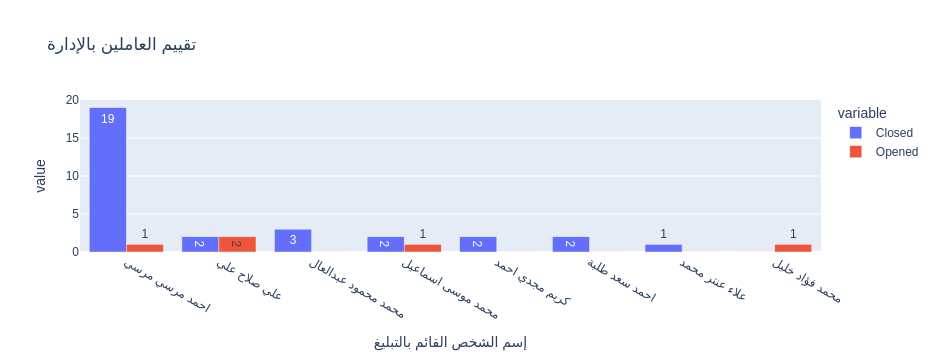

In [119]:
px.bar(data_frame=ncr_hse,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'],
       barmode='group',text_auto=True,title='تقييم العاملين باﻹدارة')

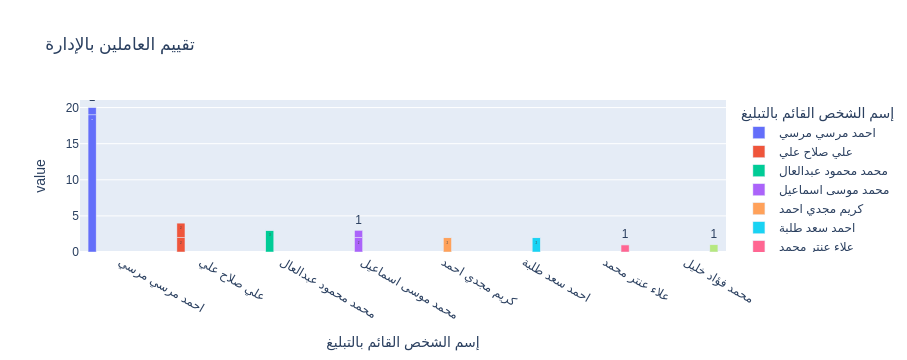

In [120]:
px.bar(data_frame=ncr_hse,x='إسم الشخص القائم بالتبليغ',
       y=['Closed', 'Opened'], barmode='group',\
       text_auto=True,color='إسم الشخص القائم بالتبليغ',\
       title='تقييم العاملين باﻹدارة')

In [121]:
ncr_department7 = july_cases.groupby(['الإدارة المتواجد بها الحالة', 'المتابعة\nFollow Up'])\
    ['المتابعة\nFollow Up'].count()\
    .unstack().fillna(0).astype(int)\
    .reset_index()

In [122]:
# حساب مجموع كل صف وإضافة عمود جديد
ncr_department7['المجموع'] = ncr_department7.sum(axis=1, numeric_only=True)

In [123]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_department7 = ncr_department7.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_department7

المتابعة Follow Up,الإدارة المتواجد بها الحالة,Closed,Opened,المجموع
0,الويب,7,0,7
1,الشؤون الادارية,2,0,2
2,الادارة الهندسية,1,0,1
3,IT,0,1,1
4,الانتاج,1,0,1
5,طبع الشيت,1,0,1


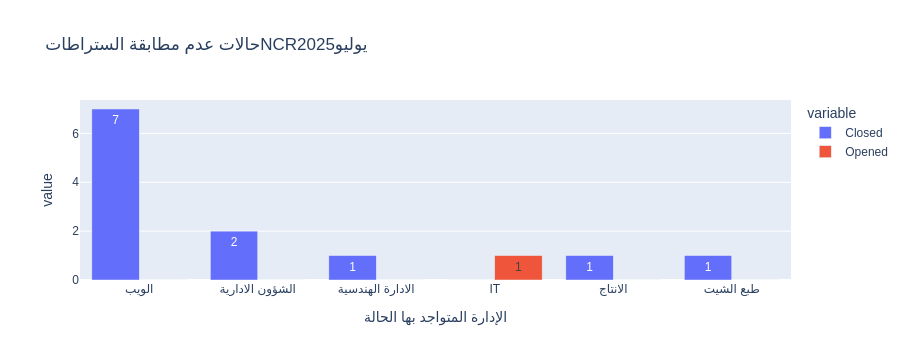

In [124]:
px.bar(data_frame=ncr_department7,x='الإدارة المتواجد بها الحالة',y=['Closed', 'Opened'], barmode='group',text_auto=True,
       title='حالات عدم مطابقة الستراطاتNCRيوليو2025')

In [125]:
ncr_hse7 = july_cases.groupby(['إسم الشخص القائم بالتبليغ', 'المتابعة\nFollow Up'])['المتابعة\nFollow Up']\
    .count().unstack().fillna(0).astype(int).reset_index()

In [126]:
# إضافة عمود للمجموع
ncr_hse7['المجموع'] = ncr_hse7.sum(axis=1, numeric_only=True)

In [127]:
# إضافة عمود للترتيب من الأكثر للأقل
ncr_hse7['الترتيب'] = ncr_hse7['المجموع'].rank(ascending=False, method='dense').astype(int)

In [128]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_hse7 = ncr_hse7.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_hse7

المتابعة Follow Up,إسم الشخص القائم بالتبليغ,Closed,Opened,المجموع,الترتيب
0,احمد مرسي مرسي,9,0,9,1
1,محمد موسى اسماعيل,1,1,2,2
2,احمد سعد طلبة,1,0,1,3
3,علي صلاح علي,1,0,1,3


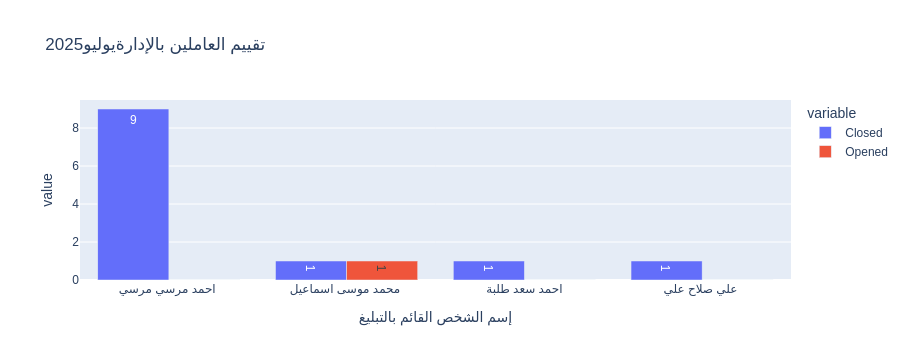

In [129]:
px.bar(data_frame=ncr_hse7,x='إسم الشخص القائم بالتبليغ',
       y=['Closed', 'Opened'], 
       barmode='group',text_auto=True,
       title=' تقييم العاملين باﻹدارةيوليو2025')


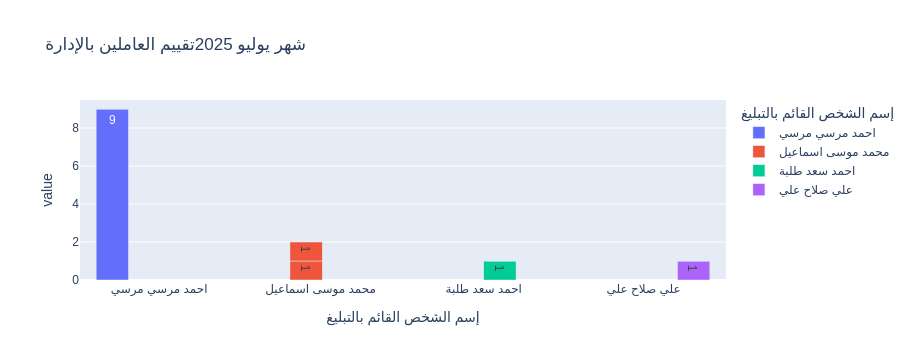

In [130]:
px.bar(data_frame=ncr_hse7,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',\
       text_auto=True,color='إسم الشخص القائم بالتبليغ',\
       title='شهر يوليو 2025تقييم العاملين باﻹدارة')

In [131]:
ncr_department8 = august_cases.groupby(['الإدارة المتواجد بها الحالة', 'المتابعة\nFollow Up'])\
    ['المتابعة\nFollow Up'].count()\
    .unstack().fillna(0).astype(int)\
    .reset_index()


In [132]:
# حساب مجموع كل صف وإضافة عمود جديد
ncr_department8['المجموع'] = ncr_department8.sum(axis=1, numeric_only=True)

In [133]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_department8 = ncr_department8.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_department8

المتابعة Follow Up,الإدارة المتواجد بها الحالة,Closed,Opened,المجموع
0,الادارة الهندسية,4,0,4
1,الويب,2,1,3
2,التجليد,2,0,2
3,الشؤون الادارية,2,0,2
4,المخازن,1,0,1


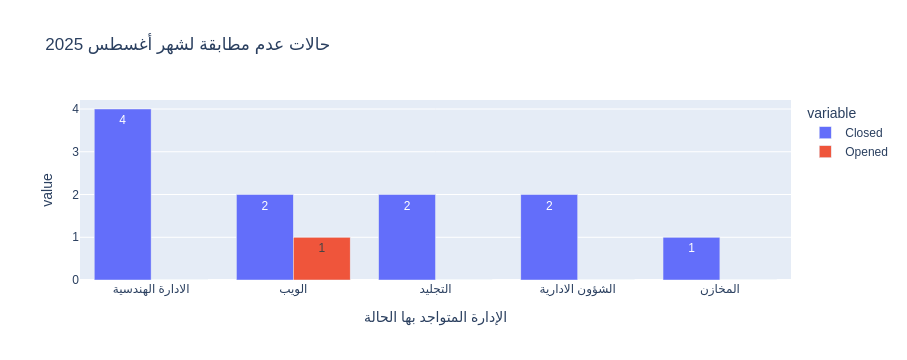

In [134]:
px.bar(data_frame=ncr_department8,x='الإدارة المتواجد بها الحالة',y=['Closed', 'Opened'], barmode='group',text_auto=True,title='حالات عدم مطابقة لشهر أغسطس 2025')


In [135]:
ncr_hse8 = august_cases.groupby(['إسم الشخص القائم بالتبليغ', 'المتابعة\nFollow Up'])['المتابعة\nFollow Up']\
    .count().unstack().fillna(0).astype(int).reset_index()


In [136]:
# إضافة عمود للمجموع
ncr_hse8['المجموع'] = ncr_hse8.sum(axis=1, numeric_only=True)


In [137]:
# إضافة عمود للترتيب من الأكثر للأقل
ncr_hse8['الترتيب'] = ncr_hse8['المجموع'].rank(ascending=False, method='dense').astype(int)


In [138]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_hse8 = ncr_hse8.sort_values('المجموع', ascending=False).reset_index(drop=True)
ncr_hse8

المتابعة Follow Up,إسم الشخص القائم بالتبليغ,Closed,Opened,المجموع,الترتيب
0,احمد مرسي مرسي,5,0,5,1
1,علي صلاح علي,1,1,2,2
2,احمد سعد طلبة,1,0,1,3
3,علاء عنتر محمد,1,0,1,3
4,كريم مجدي احمد,1,0,1,3
5,محمد محمود عبدالعال,1,0,1,3
6,محمد موسى اسماعيل,1,0,1,3


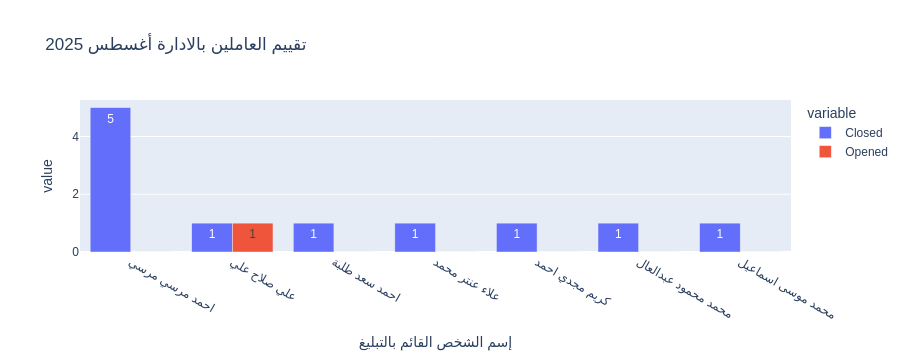

In [139]:
px.bar(data_frame=ncr_hse8,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'],
        barmode='group',text_auto=True,title="تقييم العاملين بالادارة أغسطس 2025")


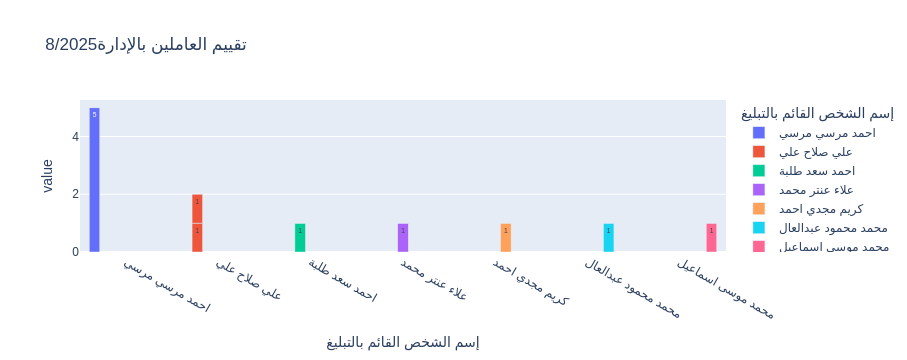

In [140]:
px.bar(data_frame=ncr_hse8,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',\
       text_auto=True,color='إسم الشخص القائم بالتبليغ',\
       title='8/2025تقييم العاملين باﻹدارة')

In [141]:
ncr_department9 = sept_cases.groupby(['الإدارة المتواجد بها الحالة', 'المتابعة\nFollow Up'])\
    ['المتابعة\nFollow Up'].count()\
    .unstack().fillna(0).astype(int)\
    .reset_index()

In [142]:
# حساب مجموع كل صف وإضافة عمود جديد
ncr_department9['المجموع'] = ncr_department7.sum(axis=1, numeric_only=True)


In [143]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_department9 = ncr_department7.sort_values('المجموع', ascending=False).reset_index(drop=True)
ncr_department9

المتابعة Follow Up,الإدارة المتواجد بها الحالة,Closed,Opened,المجموع
0,الويب,7,0,7
1,الشؤون الادارية,2,0,2
2,الادارة الهندسية,1,0,1
3,IT,0,1,1
4,الانتاج,1,0,1
5,طبع الشيت,1,0,1


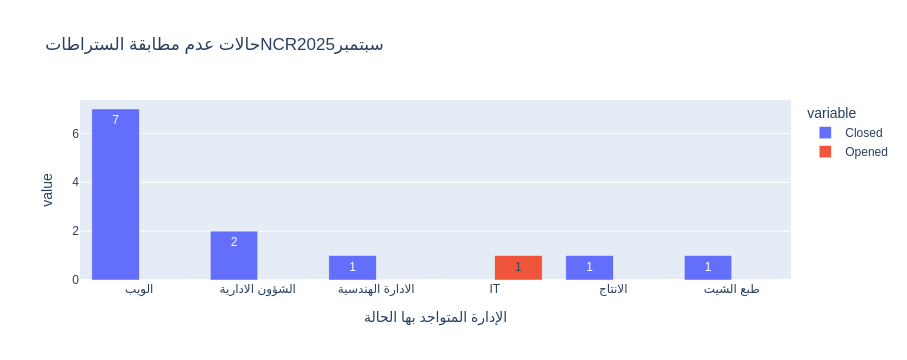

In [144]:
px.bar(data_frame=ncr_department7,x='الإدارة المتواجد بها الحالة',y=['Closed', 'Opened'],
       barmode='group',text_auto=True,title='حالات عدم مطابقة الستراطاتNCRسبتمبر2025')


In [145]:
ncr_hse9 = sept_cases.groupby(['إسم الشخص القائم بالتبليغ', 'المتابعة\nFollow Up'])['المتابعة\nFollow Up']\
    .count().unstack().fillna(0).astype(int).reset_index()


In [146]:
# إضافة عمود للمجموع
ncr_hse9['المجموع'] = ncr_hse9.sum(axis=1, numeric_only=True)


In [147]:
# إضافة عمود للترتيب من الأكثر للأقل
ncr_hse9['الترتيب'] = ncr_hse9['المجموع'].rank(ascending=False, method='dense').astype(int)


In [148]:
# ترتيب البيانات تنازلياً حسب المجموع
ncr_hse9 = ncr_hse9.sort_values('المجموع', ascending=False).reset_index(drop=True)
ncr_hse9

المتابعة Follow Up,إسم الشخص القائم بالتبليغ,Closed,Opened,المجموع,الترتيب
0,احمد مرسي مرسي,5,1,6,1
1,محمد محمود عبدالعال,2,0,2,2
2,علي صلاح علي,0,1,1,3
3,كريم مجدي احمد,1,0,1,3
4,محمد فؤاد خليل,0,1,1,3


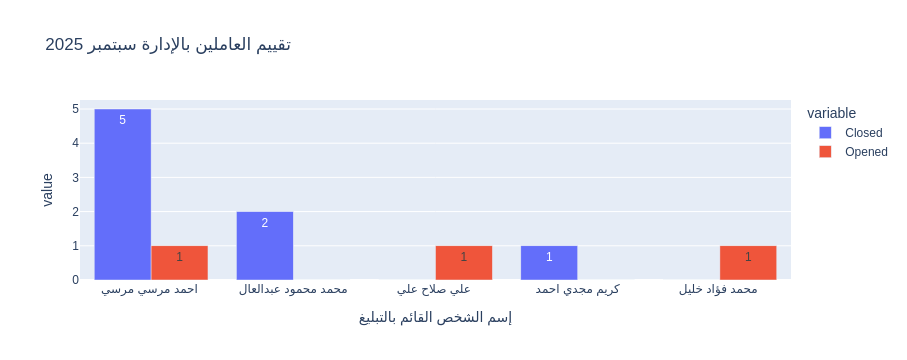

In [149]:
px.bar(data_frame=ncr_hse9,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',text_auto=True,title=' تقييم العاملين باﻹدارة سبتمبر 2025')


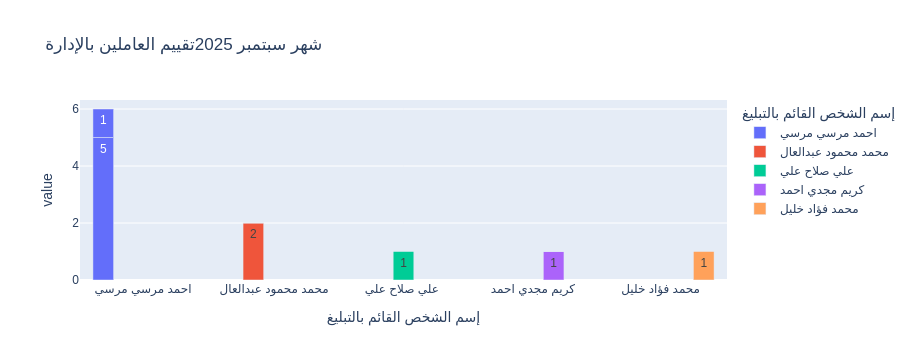

In [150]:
px.bar(data_frame=ncr_hse9,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',\
       text_auto=True,color='إسم الشخص القائم بالتبليغ',\
       title='شهر سبتمبر 2025تقييم العاملين باﻹدارة')